***Noise Reduction***

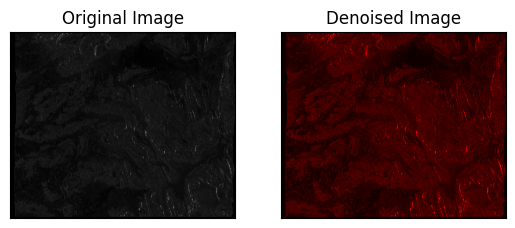

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('E:\\hamza\\HH_Khuzdad.tif', 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='hot')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [7]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

****Color Mapping***

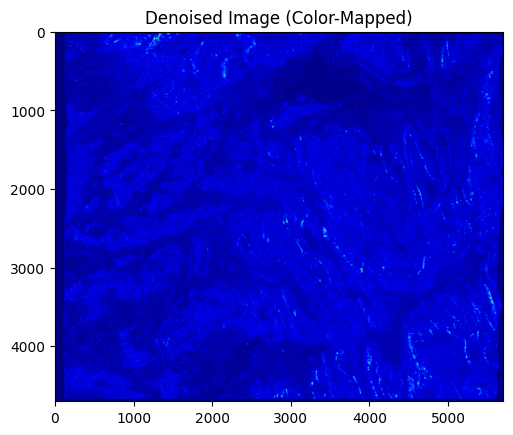

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('E:\\hamza\\HH_Khuzdad.tif', 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLORMAP_JET))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

***Mean Squared Error***

In [11]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread('E:\\hamza\\HH_Khuzdad.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 8.56911911160881


***Structural Similarity Index (SSIM)***

In [13]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread('E:\\hamza\\HH_Khuzdad.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9175664893410059


***Reading Specific Pixel Value***

In [14]:
# import cv2
# import matplotlib.pyplot as plt

# # Load the original grayscale image
# original_image = cv2.imread(r'C:\Users\Ahtasham Ahmed\OneDrive - Higher Education Commission\Desktop\Python\Microwave lab\Data\ALPSRP244140480-H2.2_UA\HH-ALPSRP244140480-H2.2_UA.tif', 0)

# # Apply noise reduction to the grayscale image
# denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# # Create a custom colormap for the denoised image (e.g., green for denoised areas)
# color_image = cv2.applyColorMap(denoised_image, cv2.COLORMAP_JET)

# # Display the original grayscale image and the custom colormap image
# plt.subplot(121), plt.imshow(original_image, cmap='gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# plt.subplot(122), plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
# plt.title('Denoised Image (Custom Color)')
# plt.show()

import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r'E:\\hamza\\HH_Khuzdad.tif', 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 11
Denoised pixel value at (150, 150): 10


***Fourier Transform***

Original Image Amplitude (Magnitude):
[[4415.         3675.181798   6917.45926808 ... 2166.72778698
  6917.45926808 3675.181798  ]
 [1271.58000678 3510.66419663  916.59202514 ... 5737.74484675
  3094.36384686 4276.82358103]
 [ 976.91486726 4270.38604525 1582.11707927 ... 4392.35339214
  2576.93323555 6214.54703026]
 ...
 [5728.74123104 2806.47985294 2402.98193967 ... 6046.92124975
  5433.73526373 1380.68336519]
 [ 976.91486726 6214.54703026 2576.93323555 ... 3579.64838655
  1582.11707927 4270.38604525]
 [1271.58000678 4276.82358103 3094.36384686 ... 4579.19260686
   916.59202514 3510.66419663]]
Denoised Image Amplitude (Magnitude):
[[1716.          588.21009585 1917.01982875 ...  537.00510051
  1917.01982875  588.21009585]
 [1661.94789826   67.29882555 1673.04669219 ... 1698.30940233
  1581.47760605 1292.15949324]
 [1141.32660448  483.17711668 1647.26351022 ... 2180.7792737
  1216.88984468  646.51835719]
 ...
 [1232.16611918 3186.00697994 1174.20542681 ... 1395.58121754
   775.39543026

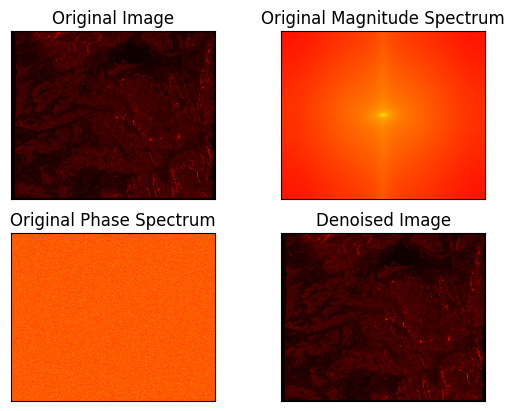

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r'E:\\hamza\\HH_Khuzdad.tif', 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='hot')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='hot')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='hot')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='hot')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")